## <CENTER>  Mätning av $Z$-bosonens massa med ATLAS-data

### Börja med att hämta datan och ladda in de i ROOT-träd.

In [1]:
import ROOT

Welcome to JupyROOT 6.14/04


In [2]:
# Leta på följande webbadress, där ni bör hitta två filer, en för händelser med elektroner och en för myoner
# http://opendata.atlas.cern/release/samples
data_file_electrons = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/Data/DataEgamma.root")
data_file_electrons_simulation = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_147770.Zee.root")
data_file_muons = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/Data/DataMuons.root")
data_file_muons_simulation = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_147771.Zmumu.root")

In [3]:
# Ladda in i träd (TFile::ls() kan användas för att lista filens innehåll)
tree_electrons = data_file_electrons.Get("mini")
tree_electrons_simulation = data_file_electrons_simulation.Get("mini")
tree_muons = data_file_muons.Get("mini")
tree_muons_simulation = data_file_muons_simulation.Get("mini")

In [4]:
tree_electrons_simulation.Print()

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries :  7500000 : Total =      2134734070 bytes  File  Size =  966057844 *
*        :          : Tree compression factor =   2.21                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries :  7500000 : Total  Size=   30006369 bytes  File Size  =     152653 *
*Baskets :       63 : Basket Size=     808960 bytes  Compression= 196.56     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries :  7500000 : Total  Size=   30006503 bytes  File Size  =   16864535 *
*Baskets :       63 : Basket Size=     808960 bytes  Compression=   1.78     *
*...................................................

### Funktioner för invariant massa

In [5]:
def getInvMass(lep1_pt, lep1_eta, lep1_phi, lep2_pt, lep2_eta, lep2_phi):
    ''' räkna ut invarianta massan med formeln i Introduktions-notboken (antar masslösa partiklar) '''
    import math
    msq = 2*lep1_pt*lep2_pt*(math.cosh(lep1_eta-lep2_eta) - math.cos(lep1_phi-lep2_phi))
    return math.sqrt(msq)

In [6]:
def getInvMassTL(lep1_pt, lep1_eta, lep1_phi, lep1_e, lep2_pt, lep2_eta, lep2_phi, lep2_e):
    ''' räkna ut invarianta massan med TLorentzVectors '''
    lep1=ROOT.TLorentzVector()
    lep2=ROOT.TLorentzVector()
    lep1.SetPtEtaPhiE(lep1_pt, lep1_eta, lep1_phi, lep1_e)
    lep2.SetPtEtaPhiE(lep2_pt, lep2_eta, lep2_phi, lep2_e)
    invmass=lep1+lep2
    return invmass.M()

### Funktion för att analysera event

In [7]:
# funktion för att analysera event
def analyseEvt(evt, hmass, particle_type):
    if evt.lep_n != 2: return
    if not (evt.lep_type[0]==particle_type and evt.lep_type[1]==particle_type): return 
    if (evt.lep_charge[0] + evt.lep_charge[1]) != 0: return
    # passed all cuts, fill histogram
    hmass.Fill(getInvMass(evt.lep_pt[0]*1e-3, evt.lep_eta[0], evt.lep_phi[0], evt.lep_pt[1]*1e-3, evt.lep_eta[1], evt.lep_phi[1]))

### Förbered histogram

In [8]:
# Definiera binnar
nbins=50
lowedge=30.
upedge=150.
# histogram för elektron-händelser och myon-händelser
h_mass_electrons = ROOT.TH1F("h_mass_electrons", "; Invariant mass [GeV]; Number of events", nbins, lowedge, upedge)
h_mass_muons = ROOT.TH1F("h_mass_muons", "; Invariant mass [GeV]; Number of events", nbins, lowedge, upedge)
h_mass_electrons_simulation = ROOT.TH1F("h_mass_electrons_simulation", "; Invariant mass [GeV]; Number of events", nbins, lowedge, upedge)
h_mass_muons_simulation = ROOT.TH1F("h_mass_muons_simulation", "; Invariant mass [GeV]; Number of events", nbins, lowedge, upedge)
# Sätt annan färg på myon-histogrammen
h_mass_muons_simulation.SetLineColor(ROOT.kRed)
h_mass_muons.SetLineColor(ROOT.kRed)
# Sätt dashed stil på simulerad
h_mass_electrons_simulation.SetMarkerStyle(5)
h_mass_electrons_simulation.SetLineStyle(9)
h_mass_muons_simulation.SetLineStyle(9)
h_mass_muons_simulation.SetMarkerStyle(5)

### Kör event-loopen, fyll histogram

In [9]:
# Loopa över alla händelser, räkna ut den invarianta massan av elektron-positron-par och myon-antimyon-par
# Detta kan t.ex. göras med hjälp av ROOT-klassen TLorentzVector eller genom att skriva en egen funktion.
# Fyll histogram med den invarianta massan.
# Använd vad ni lärde dig i första Introduktion-notebook.
# Nu tittar ni på data, så varje händelse kommer inte att innehålla en Z-boson.
# Ni måste själva sortera ut de händelser som har de karakteristiska drag man förväntar sig för Z-bosoner.

nevents=4000*7
for ievt in range(nevents):
    tree_electrons.GetEntry(ievt)
    tree_muons.GetEntry(ievt)

    analyseEvt(tree_electrons, h_mass_electrons, 11) # 11 and 13 are electrons and muons, respectively
    analyseEvt(tree_muons, h_mass_muons,     13) # 11 and 13 are electrons and muons, respectively    
    ievt += 1
    

In [10]:
# Gör samma sak för MC, så kan vi rita upp den med
nevents=4000
for ievt in range(nevents):
    tree_electrons_simulation.GetEntry(ievt)
    tree_muons_simulation.GetEntry(ievt)

    analyseEvt(tree_electrons_simulation, h_mass_electrons_simulation, 11) # 11 and 13 are electrons and muons, respectively
    analyseEvt(tree_muons_simulation, h_mass_muons_simulation,     13) # 11 and 13 are electrons and muons, respectively    
    ievt += 1

### Prepare plotting

In [11]:
%jsroot on

In [12]:
canvas = ROOT.TCanvas("canvas", "", 800, 600)

### Jämför invariant-mass-peak för elektroner och myoner

In [13]:
h_mass_electrons_simulation.Draw("e1p")
h_mass_muons_simulation.Draw("e1p SAME")
text_simu = ROOT.TLatex()
text_simu.DrawLatexNDC(0.2, 0.7, "Simulation")
canvas.Draw()

### Samma sak för data

In [14]:
h_mass_muons.Draw("e1p")
h_mass_electrons.Draw("e1p SAME")
text_simu = ROOT.TLatex()
text_simu.DrawLatexNDC(0.2, 0.7, "Data")
canvas.Draw()


### Other variables, e.g. MET

In [15]:
# Draw MET
met = ROOT.TH1F("MET_simu", "; Missing transverse energy [GeV]; Number of events", 30, 0., 90.)
tree_electrons_simulation.Draw("met_et*1e-3 >> MET_simu", "", "e1p", 5000)
met.Draw("e1p")

In [16]:
canvas.Draw()

### Prepare fitting, function for printing out goodness of fit

In [37]:
def printGOF(fitresult, msg=""):
    print("\n*** Goodness of fit. {}".format(msg))
    print("Chi2 = {:.1f}, Ndof = {}".format(fitresult.Chi2(), fitresult.Ndf()))
    if fitresult.Ndf() > 0:
        print("Reduced chi2 = {:.1f}".format(fitresult.Chi2()/fitresult.Ndf()))
    else:
        print("ERROR :: fit DOF = 0.")
    print("")

### Turn off interactive visualisation

In [18]:
%jsroot off

### clear canvas

In [24]:
canvas.Clear()

### Fit #1: Gaussian

In [38]:
# Gör en anpassning till peaken med rätt funktion
# prova först dummy Gauss
fitresult_gaussian=h_mass_electrons.Fit("gaus", "S", "SAME", 80., 100.)
printGOF(fitresult_gaussian, "Electrons")
fitresult_gaussian=h_mass_muons.Fit("gaus", "S", "SAME", 80., 100.)
printGOF(fitresult_gaussian, "Muons")


*** Goodness of fit. Electrons
Chi2 = 23.9, Ndof = 5
Reduced chi2 = 4.8


*** Goodness of fit. Muons
Chi2 = 69.1, Ndof = 5
Reduced chi2 = 13.8

 FCN=23.8577 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=1.49889e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.55766e+02   1.12409e+01   2.02300e-02  -1.73823e-05
   2  Mean         8.96720e+01   1.21829e-01   2.90207e-04   6.59372e-04
   3  Sigma        3.56824e+00   1.11764e-01   1.87479e-05  -5.87971e-03
 FCN=69.099 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=6.39176e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.23280e+02   1.

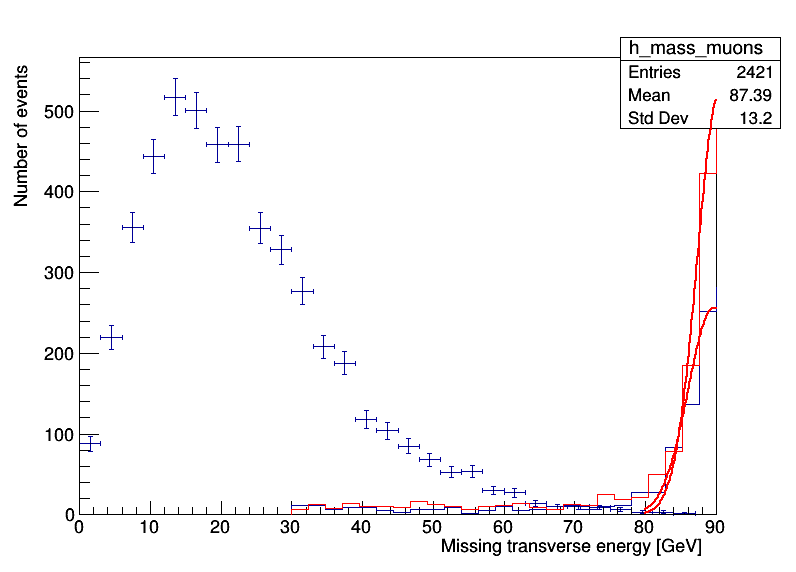

In [21]:
canvas.Draw()

### Fit #2: Breit-Wigner

In [39]:
### function for printing mean and width
def printFitResult(fitresult, msg=""):
    print("\n*** Fit result. {}".format(msg))
    print("Mass = {:.2f} +/- {:.2f} ".format(fitresult.Parameter(1), fitresult.ParError(1)))
    print()

In [23]:
#### Prepare: setting Breit-Wigner limits, colors on functions etc.
norm_low = 100; norm_up = 15e3
mean_low = 80; mean_up = 100
width_low = 0.1; width_up = 40
def setBWLims(func):
    ''' Set limits on BW parameters '''
    func.SetParameters(0.5*(norm_low+norm_up), 0.5*(mean_low+mean_up), 0.5*(width_low+width_up))
    func.SetParLimits(0, norm_low, norm_up)
    func.SetParLimits(1, mean_low, mean_up)
    func.SetParLimits(2, width_low, width_up)
def setColor(ROOT_obj, color=ROOT.kBlack):
    ''' set (line) color'''
    ROOT_obj.SetLineColor(color)

In [26]:
#### DEFINE SOME BREIT-WIGNER FUNCTIONS
xlow_fit=30.; xup_fit=140.;
#foo=ROOT.TMath.BreitWigner(4., 3., 3.)
fBW = ROOT.TF1("fBW", "[0]*TMath::BreitWigner(x, [1], [2])", xlow_fit, xup_fit)
setBWLims(fBW)
# declare its own function for signal
fSig = ROOT.TF1("fSig", "[0]*TMath::BreitWigner(x, [1], [2])", xlow_fit, xup_fit)
# first order polynomial as background
fFit1 = ROOT.TF1("fit1", "fBW+pol1(3)", xlow_fit, xup_fit)
setBWLims(fFit1)
# second order polynomial as background
fFit2 = ROOT.TF1("fit2", "fBW+pol2(3)", xlow_fit, xup_fit)
# second order polynomial only
fBkg2 = ROOT.TF1("bkg2", "pol2", xlow_fit, xup_fit)
setBWLims(fFit2)
# third order polynomial as background
fFit3 = ROOT.TF1("fit3", "fBW+pol3(3)", xlow_fit, xup_fit)
setBWLims(fFit3)
# constant plus exponential for bkg
fBkg = ROOT.TF1("bkg", "pol0+expo(1)", xlow_fit, xup_fit)
print("background model (exponential+constant):")
fBkg.Print()
fModel = ROOT.TF1("model", "fBW+bkg", xlow_fit, xup_fit)
setBWLims(fModel)
print("total signal+background model:")
fModel.Print()
# set color
setColor(fBkg, ROOT.kRed)
setColor(fFit1); setColor(fFit2); setColor(fFit3);
setColor(fBW, ROOT.kBlue)
#setColor(fBkg2, ROOT.kBlue)

background model (exponential+constant):
total signal+background model:
Formula based function:     bkg 
                  bkg : pol0+expo(1) Ndim= 1, Npar= 3, Number= 0 
 Formula expression: 
	[p0]+exp([p1]+[p2]*x) 
Formula based function:     model 
                model : fBW+bkg Ndim= 1, Npar= 6, Number= 0 
 Formula expression: 
	([p0]*TMath::BreitWigner(x,[p1],[p2]))+([p3]+exp([p4]+[p5]*x)) 


In [ ]:
# %jsroot on


*** Goodness of fit. Breit-Wigner + exponential, muons, fitoption 'SL'
Chi2 = 113.9, Ndof = 40
Reduced chi2 = 2.8


*** Fit result. Breit-Wigner + exponential, muons, fitoption 'SL'
Mass = 90.58 +/- 0.07 

 FCN=40.6276 FROM MIGRAD    STATUS=CONVERGED     461 CALLS         462 TOTAL
                     EDM=8.18995e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.93914e+03   1.20426e+02   7.06623e-05  -5.02354e-03
   2  p1           9.05837e+01   7.40132e-02   3.24626e-05  -9.13653e-03
   3  p2           4.58157e+00   1.61712e-01   5.12305e-05   9.92967e-03
   4  p3          -2.25882e+00   1.06310e+00   1.18489e-03  -4.53456e-04
   5  p4           3.38199e+00   2.62077e-01   3.20489e-04  -2.65610e-03
   6  p5          -2.30024e-02   7.40075e-03   4.89865e-06  -1.31821e-01
                               ERR DEF= 0.5


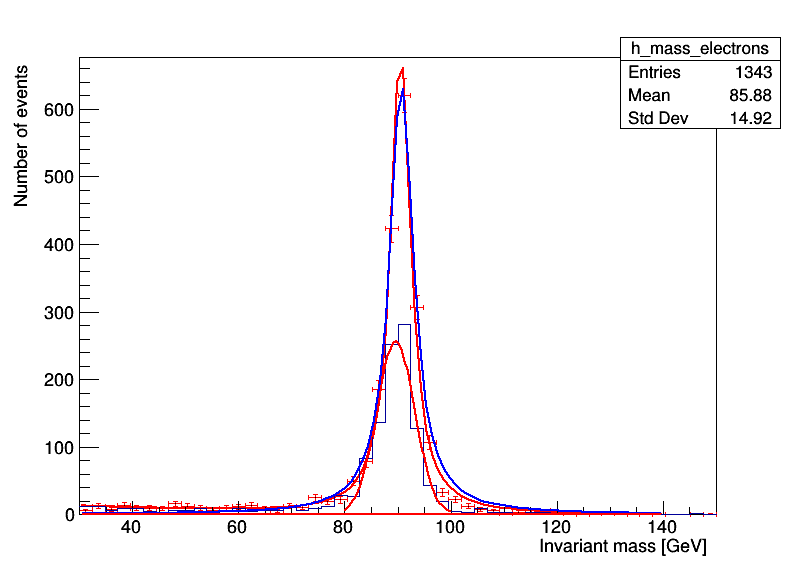

In [40]:
### fit with muons
fitoption="SL"
fitresult=h_mass_muons.Fit("model", fitoption, "e1p", xlow_fit, xup_fit) # store fit result
printGOF(fitresult, "Breit-Wigner + exponential, muons, fitoption '{}'".format(fitoption))
printFitResult(fitresult, "Breit-Wigner + exponential, muons, fitoption '{}'".format(fitoption))

# Draw signal and bkg on top, using fit result
fBW.Draw("SAME") # signal
fBkg.Draw("SAME") # background

# h_mass_muons.SetMaximum(50.)
canvas.Draw()


*** Goodness of fit. Breit-Wigner + exponential, electrons, fitoption 'SL'
Chi2 = 136.3, Ndof = 40
Reduced chi2 = 3.4


*** Fit result. Breit-Wigner + exponential, electrons, fitoption 'SL'
Mass = 89.84 +/- 0.11 

 FCN=43.8285 FROM MIGRAD    STATUS=CONVERGED      91 CALLS          92 TOTAL
                     EDM=7.5524e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.75157e+03   9.07985e+01   6.70758e-05  -9.37850e-05
   2  p1           8.98384e+01   1.13027e-01   5.09876e-05  -2.72702e-05
   3  p2           5.34621e+00   2.67944e-01   8.04000e-05  -7.54774e-05
   4  p3          -7.16453e-01   3.32395e-01   1.03019e-03   6.18577e-06
   5  p4           3.69347e+00   4.56011e-01   4.96227e-04  -2.52038e-05
   6  p5          -4.10136e-02   1.10123e-02   1.06859e-05  -1.62270e-03
                               ERR DEF= 0.5


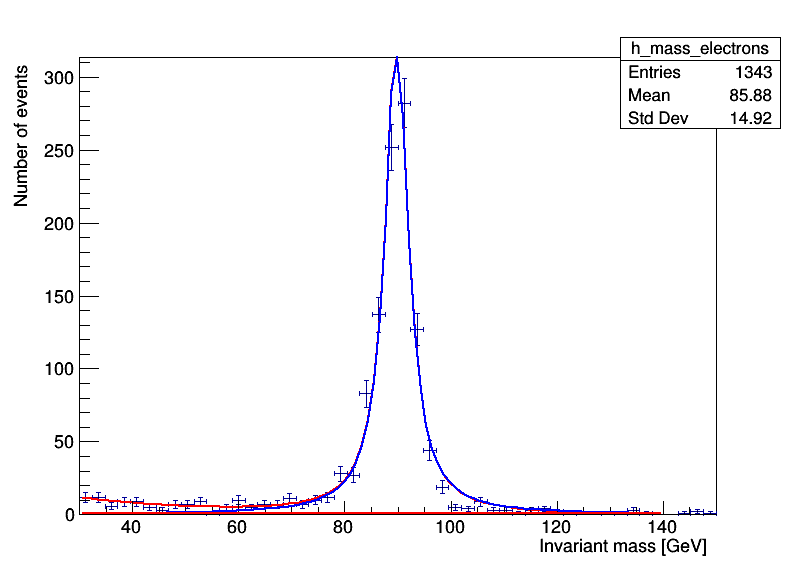

In [32]:
### Same thing for electrons
fitresult=h_mass_electrons.Fit("model", fitoption, "e1p", xlow_fit, xup_fit) # store fit result
printGOF(fitresult, "Breit-Wigner + exponential, electrons, fitoption '{}'".format(fitoption))
printFitResult(fitresult, "Breit-Wigner + exponential, electrons, fitoption '{}'".format(fitoption))

# Draw signal and bkg on top
fBW.Draw("SAME") # signal
fBkg.Draw("SAME") # background

# h_mass_muons.SetMaximum(50.)
canvas.Draw()

### Fit #2b: Breit-Wigner in smaller range around peak


*** Goodness of fit. Breit-Wigner + exponential, tight fit range, muons, fitoption 'SL'
Chi2 = 5.4, Ndof = 3
Reduced chi2 = 1.8


*** Fit result. Breit-Wigner + exponential, tight fit range, muons, fitoption 'SL'
Mass = 90.68 +/- 0.08 

 FCN=2.5962 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=3.65276e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.28563e+03   1.39602e+02   2.18121e-05   1.63943e-04
   2  p1           9.06842e+01   8.25167e-02   9.94873e-06  -1.14959e-04
   3  p2           5.16171e+00   2.12215e-01   1.75677e-05   1.10604e-03
                               ERR DEF= 0.5


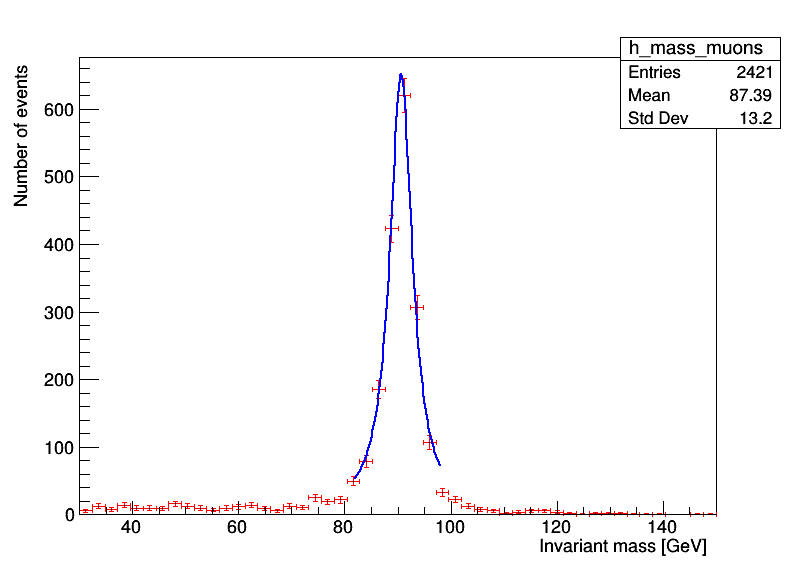

In [45]:
### fit with muons
canvas.Clear()
fitoption="SL"
fitresult=h_mass_muons.Fit("fBW", fitoption, "e1p", 82., 98.) # store fit result
printGOF(fitresult, "Breit-Wigner + exponential, tight fit range, muons, fitoption '{}'".format(fitoption))
printFitResult(fitresult, "Breit-Wigner + exponential, tight fit range, muons, fitoption '{}'".format(fitoption))

# h_mass_muons.SetMaximum(50.)
canvas.Draw()


*** Goodness of fit. Breit-Wigner + exponential, tight fit range, electrons, fitoption 'SL'
Chi2 = 14.8, Ndof = 3
Reduced chi2 = 4.9


*** Fit result. Breit-Wigner + exponential, tight fit range, electrons, fitoption 'SL'
Mass = 89.89 +/- 0.13 

 FCN=6.75632 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=8.59098e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.99128e+03   1.13633e+02   3.10468e-05   1.32871e-02
   2  p1           8.98853e+01   1.29870e-01   2.39800e-05   5.29939e-04
   3  p2           6.20428e+00   3.87432e-01   4.31935e-05  -1.18271e-02
                               ERR DEF= 0.5


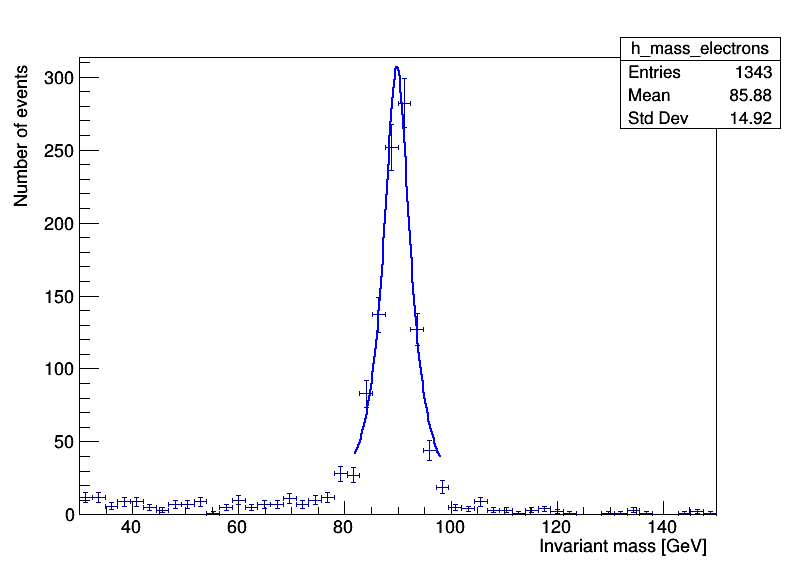

In [46]:
### fit with electrons
canvas.Clear()
fitoption="SL"
fitresult=h_mass_electrons.Fit("fBW", fitoption, "e1p", 82., 98.) # store fit result
printGOF(fitresult, "Breit-Wigner + exponential, tight fit range, electrons, fitoption '{}'".format(fitoption))
printFitResult(fitresult, "Breit-Wigner + exponential, tight fit range, electrons, fitoption '{}'".format(fitoption))

# h_mass_muons.SetMaximum(50.)
canvas.Draw()

### Conclusion: Difficult to get mean exactly right. Works better if smaller range is used.

Electrons and muons behave a bit differently. Due to Bremsstrahlung?

Width larger than it should be, I think due to ISR and possibly other instrumental effects not accounted for.